In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.style
import matplotlib as mpl
from sklearn.model_selection import KFold


from common_functions import foo
mpl.style.use('classic')

%load_ext autoreload
%autoreload 2
results = "results"

In [2]:
from common_functions import latexify, format_axes, tableau20blind
# latexify(14, 8)

In [3]:
params = {
    'lines.linewidth': 2,
    'lines.color': 'k',
#     'boxplot.boxprops.linewidth': 20,
    'boxplot.boxprops.color': 'k',
    'patch.linewidth': 2,
    'legend.fontsize': 14 + 4,
    'legend.framealpha': .6,
    'axes.titlesize': 14 + 4,
    "axes.labelsize": 14 + 4,
    'xtick.labelsize': 14 + 4,
    'ytick.labelsize': 16 + 4,
#     'axes.labelweight': 'bold',
    'axes.linewidth': 2,
#     'font.weight': 'bold'
    
}
matplotlib.rcParams.update(params)

In [4]:
datafile = '../data/beijinga_scaled.csv'

In [5]:
splits = 6
datadf = pd.read_csv(datafile, index_col=0)
allStations = datadf['station_id'].unique()
allStations.sort()

kfout = KFold(n_splits=splits, shuffle=True, random_state=0)
kfin = KFold(n_splits=splits - 1, shuffle=True, random_state=0)
datadf.head()

,latitude,longitude,ts,station_id,PM2.5
0,0.58292,0.17557,0.000000,1001.0,156.250000
0,0.58292,0.17557,0.002747,1001.0,24.833333
0,0.58292,0.17557,0.005495,1001.0,72.583333
0,0.58292,0.17557,0.008242,1001.0,30.043478
0,0.58292,0.17557,0.010989,1001.0,23.083333


In [6]:
lastKDays = 30

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

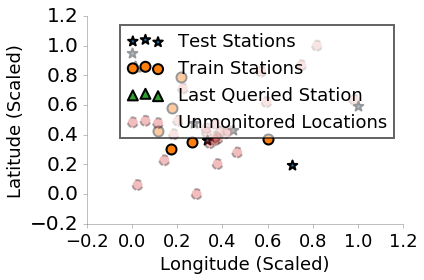

No handles with labels found to put in legend.


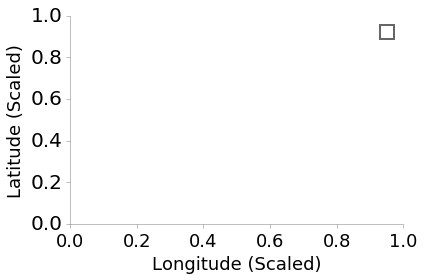

No handles with labels found to put in legend.


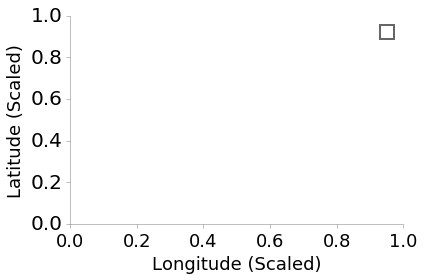

No handles with labels found to put in legend.


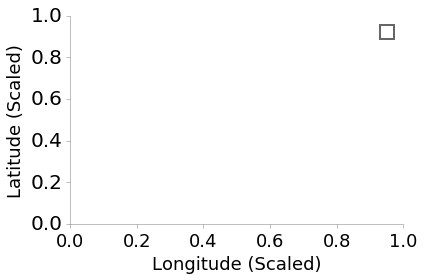

No handles with labels found to put in legend.


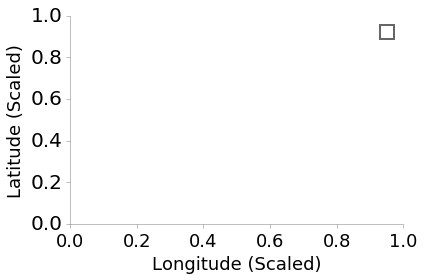

No handles with labels found to put in legend.


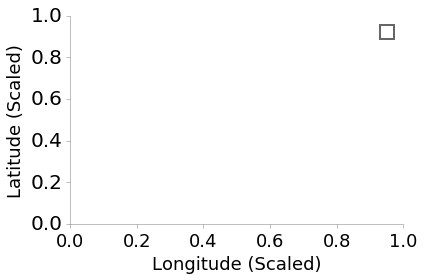

No handles with labels found to put in legend.


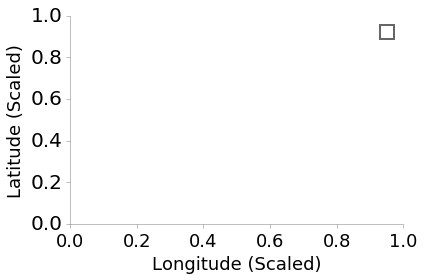

No handles with labels found to put in legend.


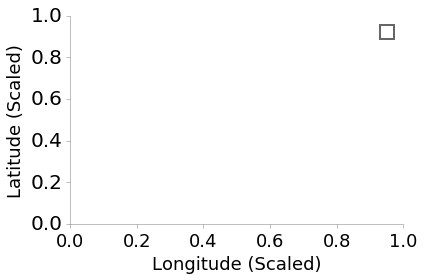

No handles with labels found to put in legend.


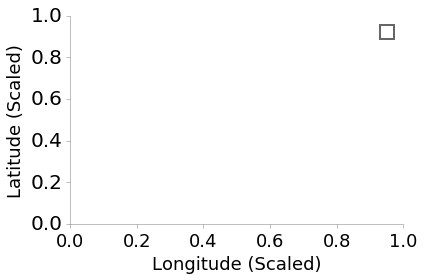

No handles with labels found to put in legend.


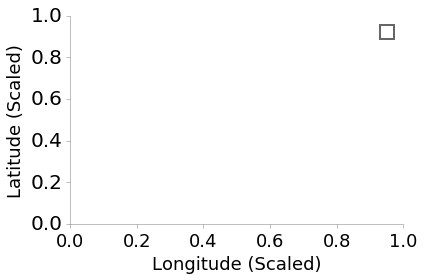

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

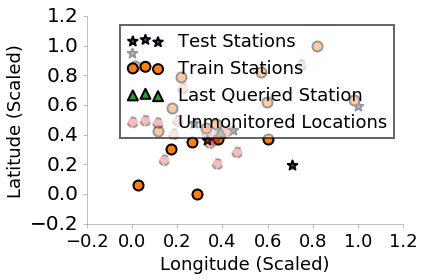

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

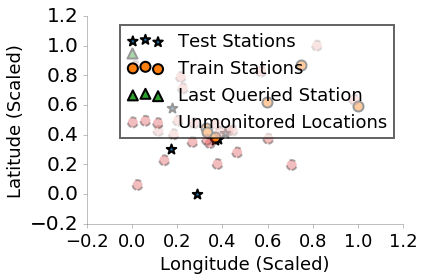

No handles with labels found to put in legend.


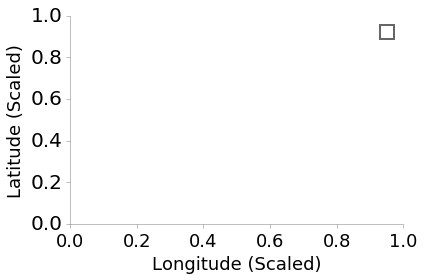

No handles with labels found to put in legend.


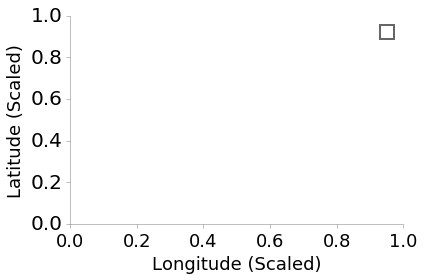

No handles with labels found to put in legend.


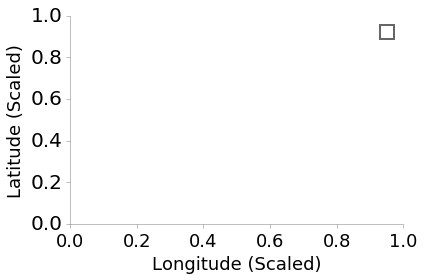

No handles with labels found to put in legend.


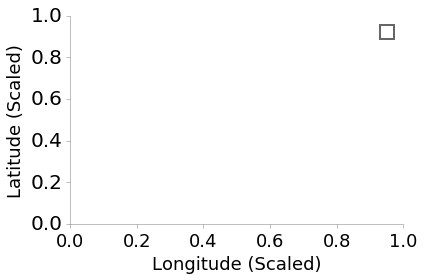

No handles with labels found to put in legend.


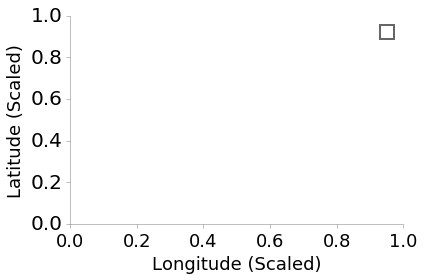

No handles with labels found to put in legend.


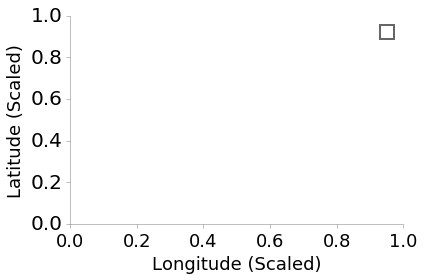

No handles with labels found to put in legend.


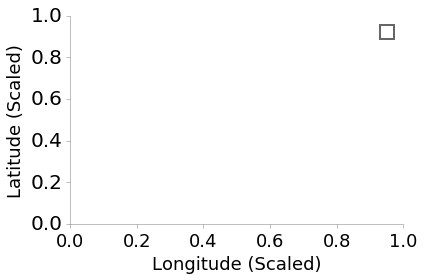

No handles with labels found to put in legend.


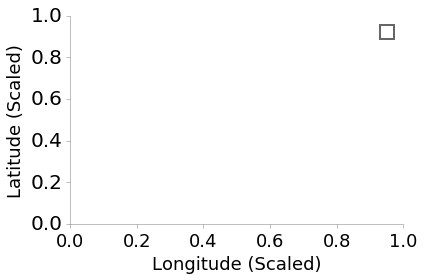

No handles with labels found to put in legend.


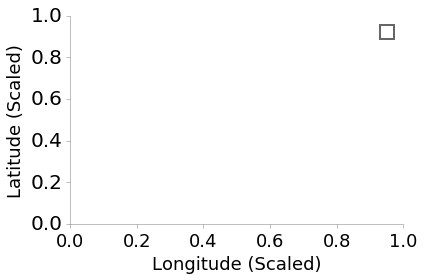

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

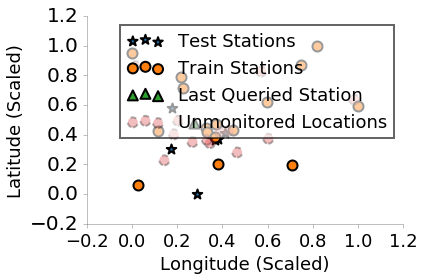

In [7]:
for reg in ['gp']: # (3, 0), (1,0), (1,1), (2,0), (2, 1), (5,0)
    for kout, kin in [ (2, 4), (5, 1)]:
        sts_ftrain_index, sts_test_index = list(kfout.split(allStations))[kout]
        sts_train_index, sts_val_index = list(kfin.split(sts_ftrain_index))[kin]

        # get the station ids
        sts_test = list(allStations[sts_test_index]) # test
        sts_val = list(allStations[sts_ftrain_index[sts_val_index]]) # train
        sts_pool = list(allStations[sts_ftrain_index[sts_train_index]]) # pool
        sts_train = [] # pool

        grouped = datadf.groupby("station_id")

        queried_stations = np.load(f"../exp2/src/{results}/{lastKDays}/final_{reg}/{kout}_{kin}/stations.npy")
        for qix, qStation in enumerate(queried_stations):
            # get the index of the stations
            sts_pool.remove(qStation)
            sts_train = [qStation]
            
            
            for ix, (marker, strStations, stations) in enumerate(zip(
                ["*", 'o', '^', 'o'],
                ["Test Stations", "Train Stations", "Last Queried Station", "Unmonitored Locations"], 
                [sts_test, sts_val, sts_train, sts_pool]
            )):

                longs = []
                lats = []
                for station in stations:
                    tempdf = grouped.get_group(station)
                    long = tempdf["longitude"].mean()
                    lat = tempdf["latitude"].mean()

        #             print ("done")
        #             print (long)
        #             assert (len(long) == 1)
        #             assert (len(lat) == 1)

                    longs.append(long)
                    lats.append(lat)

                if ix == 3:
                    linestyle = '--'
                    alpha = .3
                else:
                    alpha = 1
                    linestyle = '-'
                if qix in [len(queried_stations)-1, 0]:
                    plt.scatter(longs, lats, 
                                label=strStations, 
                                c=tableau20blind[ix * 2],
                                s=100,
                                marker=marker,
                                linestyle = linestyle, 
                                alpha = alpha,
                               )
            plt.legend(loc="upper")
            plt.xlabel("Longitude (Scaled)")
            plt.ylabel("Latitude (Scaled)")
#                 plt.title(f"{reg}")
            format_axes(plt.gca())
            plt.tight_layout()
            plt.savefig(f'./plts/explexp2/{reg}_kout{kout}_kin{kin}_{qix}.svg')
            plt.show()
            sts_val.append(qStation)